# Machine Learning 2023/2024

## First Home Assignment

**Group Number:** 10

**Group Elements:**
- André Santos (fc53323)
- Filipe Santos (fc53304)
- João Martins (fc62532)
- Rúben Torres (fc62531)

**Hours Worked:**
- André Santos (10h)
- Filipe Santos (10h)
- João Martins (10h)
- Rúben Torres (10h)

### Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn import tree

### Loading the Dataset

In [2]:
df = pd.read_csv("HA1-DatasetScaled.tsv", sep="\t")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,52.000
1,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,50.000
2,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,41.500
3,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,32.000
4,-2.1737,-1.5994,-0.9850,-1.0041,-0.5006,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,-0.9684,-1.0090,-0.8995,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,29.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21169,-1.4777,-1.5696,-1.3792,-1.0551,-0.8610,-1.4650,-2.6345,-1.6094,-0.2289,-1.5220,...,-0.1272,0.3895,-0.0463,-1.5698,-2.7590,-0.8366,1.5587,-0.6981,-1.4088,0.596
21170,-1.4777,-1.5696,-1.3794,-1.0551,-0.8612,-1.4650,-2.6426,-1.6094,-0.2281,-1.5220,...,-0.1274,0.3895,-0.0465,-1.5698,-2.7649,-0.8366,1.5605,-0.6981,-1.4181,0.700
21171,0.6104,-1.2091,-0.3571,-0.8493,-0.0501,0.8948,-0.0899,-0.8092,0.1210,-1.0294,...,-0.8538,-0.6248,-0.8270,0.5646,0.6106,0.7715,-0.4937,0.7460,-0.1070,73.000
21172,-1.4777,2.3104,3.2518,2.5600,3.2684,-1.3983,-1.7172,-0.6162,3.8693,-0.1679,...,1.2167,0.7801,1.2440,-1.6243,-1.7637,-0.0325,1.9778,0.3334,0.2772,0.280


<h3>Objective 1:<br> Produce the best regression model for critical_temp (Dependent Variable)</h3>

In [3]:
df_x = df.drop("critical_temp", axis = 1)
df_y = df["critical_temp"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_x.values, 
                                                    df_y.values, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)


(15880, 81)
(5294, 81)


Decision tree Regression model

In [5]:
mdl = DecisionTreeRegressor(max_depth=5)
mdl.fit(X_test, y_test)

dtr_preds=mdl.predict(X_test)

#explained_variance_score(y_test, dtr_preds)

Linear Regression model

In [6]:
reg = LinearRegression()
reg.fit(X_train, y_train)

lr_preds=reg.predict(X_test)

#explained_variance_score(y_test, lr_preds)

Regularized linear models

Ridge Regression model

In [7]:
ridge = Ridge(alpha=10, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  ridge.intercept_)
print("The other parameters are: ")
#for i, beta in enumerate(ridge.coef_):
#    print("\t B%02d -> %9.3f"% (i+1, beta))

ridge_preds=ridge.predict(X_test)

The bias is:  34.57197419584233
The other parameters are: 


Lasso Regression model

In [8]:
lasso = Lasso(alpha=10, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  lasso.intercept_)
print("The other parameters are: ")
#for i, beta in enumerate(ridge.coef_):
#    print("\t B%02d -> %9.3f"% (i+1, beta))

lasso_preds= lasso.predict(X_test)

The bias is:  34.46923180502305
The other parameters are: 


Gráficos

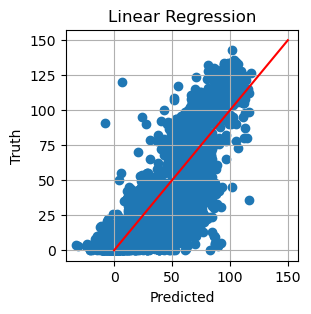

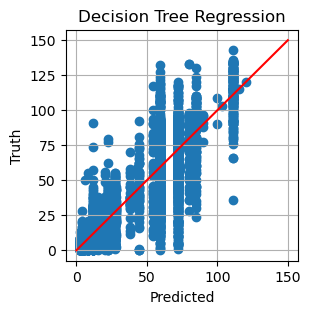

In [9]:
#####  Gráfico linear regression #########
plt.figure(figsize=(3,3))
plt.scatter(lr_preds, y_test)
plt.plot((0, 150), (0,150), c="r")
plt.grid()
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Linear Regression")
plt.show()

#####  Gráfico decision tree regression #########
plt.figure(figsize=(3,3))
plt.scatter(dtr_preds, y_test)
plt.plot((0, 150), (0,150), c="r")
plt.grid()
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Decision Tree Regression")
plt.show()


In [10]:
def printAvalStat(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval=pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))

    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is:", mean_absolute_error(truth, preds),"\n")

In [11]:
###############   Métricas de avaliação de linear regression
print("Métricas de avaliação de linear regression:")
printAvalStat(y_test, lr_preds)

###############   Métricas de avaliação de decision tree regression
print("Métricas de avaliação de decision tree regression:")
printAvalStat(y_test, dtr_preds)

###############   Métricas de avaliação de ridge regression
print("Métricas de avaliação de ridge regression:")
printAvalStat(y_test, ridge_preds)

###############   Métricas de avaliação de lasso regression
print("Métricas de avaliação de lasso regression:")
printAvalStat(y_test, lasso_preds)

Métricas de avaliação de linear regression:
The RVE is:  0.7325549159767302
The rmse is:  17.937738866851145
The Correlation Score is: 0.8559 (p-value=0.000000e+00)
The Maximum Error is:  113.18917082049799
The Mean Absolute Error is: 13.564847251223169 

Métricas de avaliação de decision tree regression:
The RVE is:  0.7847273216432487
The rmse is:  16.093202717485656
The Correlation Score is: 0.8858 (p-value=0.000000e+00)
The Maximum Error is:  79.49212134831461
The Mean Absolute Error is: 10.93756033506193 

Métricas de avaliação de ridge regression:
The RVE is:  0.7288058231484296
The rmse is:  18.06300703568197
The Correlation Score is: 0.8537 (p-value=0.000000e+00)
The Maximum Error is:  109.93960911427271
The Mean Absolute Error is: 13.663599574439479 

Métricas de avaliação de lasso regression:
The RVE is:  0.45253310961860427
The rmse is:  25.66666247668268
The Correlation Score is: 0.7426 (p-value=0.000000e+00)
The Maximum Error is:  97.0290138486915
The Mean Absolute Error i

<h3>Objective 2:<br>Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases</h3>

Decision tree classifier

In [18]:
########## Reclassificação dos valores de Critical_temp em classes discretas ###########

df_critical = df

#print(df_critical.values[0, 81])

if df_critical.values[0, 81] == 52.0:
    df_critical['critical_temp'] = df_critical['critical_temp'].apply(
        lambda x:"negative" if x < 80 else
        "positive"
    )

df_crit_x = df_critical.drop("critical_temp", axis = 1)
df_crit_y = df_critical["critical_temp"]

52.0


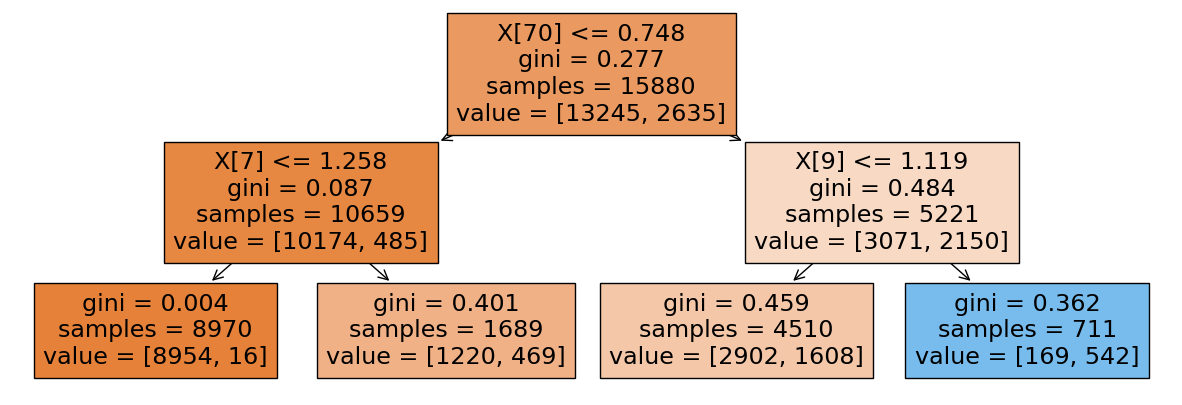

In [19]:
X_crit_train, X_crit_test, y_crit_train, y_crit_test = train_test_split(df_crit_x.values, 
                                                    df_crit_y.values, 
                                                    random_state=0)   #test_size=0.2, random_state=22

dt = tree.DecisionTreeClassifier(max_depth=2) #parametros no construtor
dt = dt.fit(X_crit_train , y_crit_train)

plt.figure(figsize=(15, 5))
r=tree.plot_tree(dt, filled=True)#, feature_names= df.columns)
plt.show()

In [20]:
preds= dt.predict(X_test)

Logistic regression classification model

In [ ]:
#####  Gráfico decision tree classifier #########


In [21]:
###############   Métricas de avaliação de decision tree classifier
print("Métricas de avaliação de decision tree classifier:")



Métricas de avaliação de decision tree classifier:
